# <h1 style="color: #FF8C00;">01 | Data Extraction </h1>

In [1]:
# 📚 Basic Libraries
import pandas as pd
import numpy as np

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
df=pd.read_csv("../data/king_ country_ houses_aa.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<h2 style="color: #FF6347;">Exploring the Data (First impression)</h2>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

### We can see the columns are already standardized

# <h1 style="color: #FF8C00;">02 | Data Cleaning </h1>

## <h2 style="color: #FF6347;">Dealing with NaN values</h2>

In [6]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## <h2 style="color: #FF6347;">Dealing with Duplicates</h2>

In [7]:
df.duplicated().sum()

0

## <h2 style="color: #FF6347;">Dealing with Empty Spaces</h2>

In [8]:
df.eq(" ").sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## <h2 style="color: #FF6347;">Droping "ID" column</h2>

In [9]:
df=df.drop(columns="id")

# <h1 style="color: #FF8C00;">03 | EDA </h1>

## <h2 style="color: #FF6347;">Descriptive Statistics</h2>

In [10]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## <h2 style="color: #FF6347;">Column per column</h2>

In [11]:
df1=df.copy()

In [12]:
df1.date=pd.to_datetime(df1.date)

In [13]:
df1.date=df1.date.apply(lambda x:x.toordinal())


In [14]:
columns=df.columns.to_list()
for column in columns:
    print(column,df1[column].unique())

date [735519 735576 735654 735647 735365 735411 735613 735703 735669 735691
 735380 735381 735513 735622 735445 735382 735572 735712 735367 735471
 735417 735369 735557 735540 735410 735568 735408 735659 735547 735570
 735397 735597 735642 735404 735429 735456 735421 735534 735443 735432
 735682 735430 735716 735668 735492 735646 735598 735634 735660 735464
 735695 735472 735652 735577 735473 735527 735574 735387 735485 735515
 735470 735396 735488 735603 735394 735424 735673 735542 735708 735393
 735680 735569 735589 735626 735386 735551 735402 735372 735480 735375
 735655 735439 735590 735484 735687 735425 735395 735533 735579 735500
 735690 735376 735437 735662 735661 735561 735558 735407 735606 735729
 735600 735556 735694 735541 735431 735624 735458 735450 735360 735422
 735726 735656 735409 735451 735536 735465 735697 735688 735689 735442
 735452 735550 735509 735666 735457 735575 735648 735681 735389 735355
 735614 735505 735639 735423 735383 735554 735605 735702 735481 735358
 

#### Some of the columns with weird values are:
Bedrooms (33 bedrooms?) \
Bathrooms (too many per room) \
Floors (dropping or not dropping half stories)






In [15]:
df1[df1["bedrooms"] == 33].index

Index([15870], dtype='int64')

In [16]:
df1.iloc[15870]

date             735409.0000
price            640000.0000
bedrooms             33.0000
bathrooms             1.7500
sqft_living        1620.0000
sqft_lot           6000.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             5.0000
grade                 7.0000
sqft_above         1040.0000
sqft_basement       580.0000
yr_built           1947.0000
yr_renovated          0.0000
zipcode           98103.0000
lat                  47.6878
long               -122.3310
sqft_living15      1330.0000
sqft_lot15         4700.0000
Name: 15870, dtype: float64

In [17]:
df1.date.value_counts()

date
735407    142
735410    131
735409    131
735422    127
735715    126
         ... 
735539      1
735629      1
735742      1
735370      1
735441      1
Name: count, Length: 372, dtype: int64

In [18]:
df1.nunique()

date              372
price            4028
bedrooms           13
bathrooms          30
sqft_living      1038
sqft_lot         9782
floors              6
waterfront          2
view                5
condition           5
grade              12
sqft_above        946
sqft_basement     306
yr_built          116
yr_renovated       70
zipcode            70
lat              5034
long              752
sqft_living15     777
sqft_lot15       8689
dtype: int64

In [19]:
df1.floors.value_counts()

floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

In [20]:
df1.yr_renovated.value_counts()

yr_renovated
0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

## <h2 style="color: #FF6347;">Checking Distributions</h2>

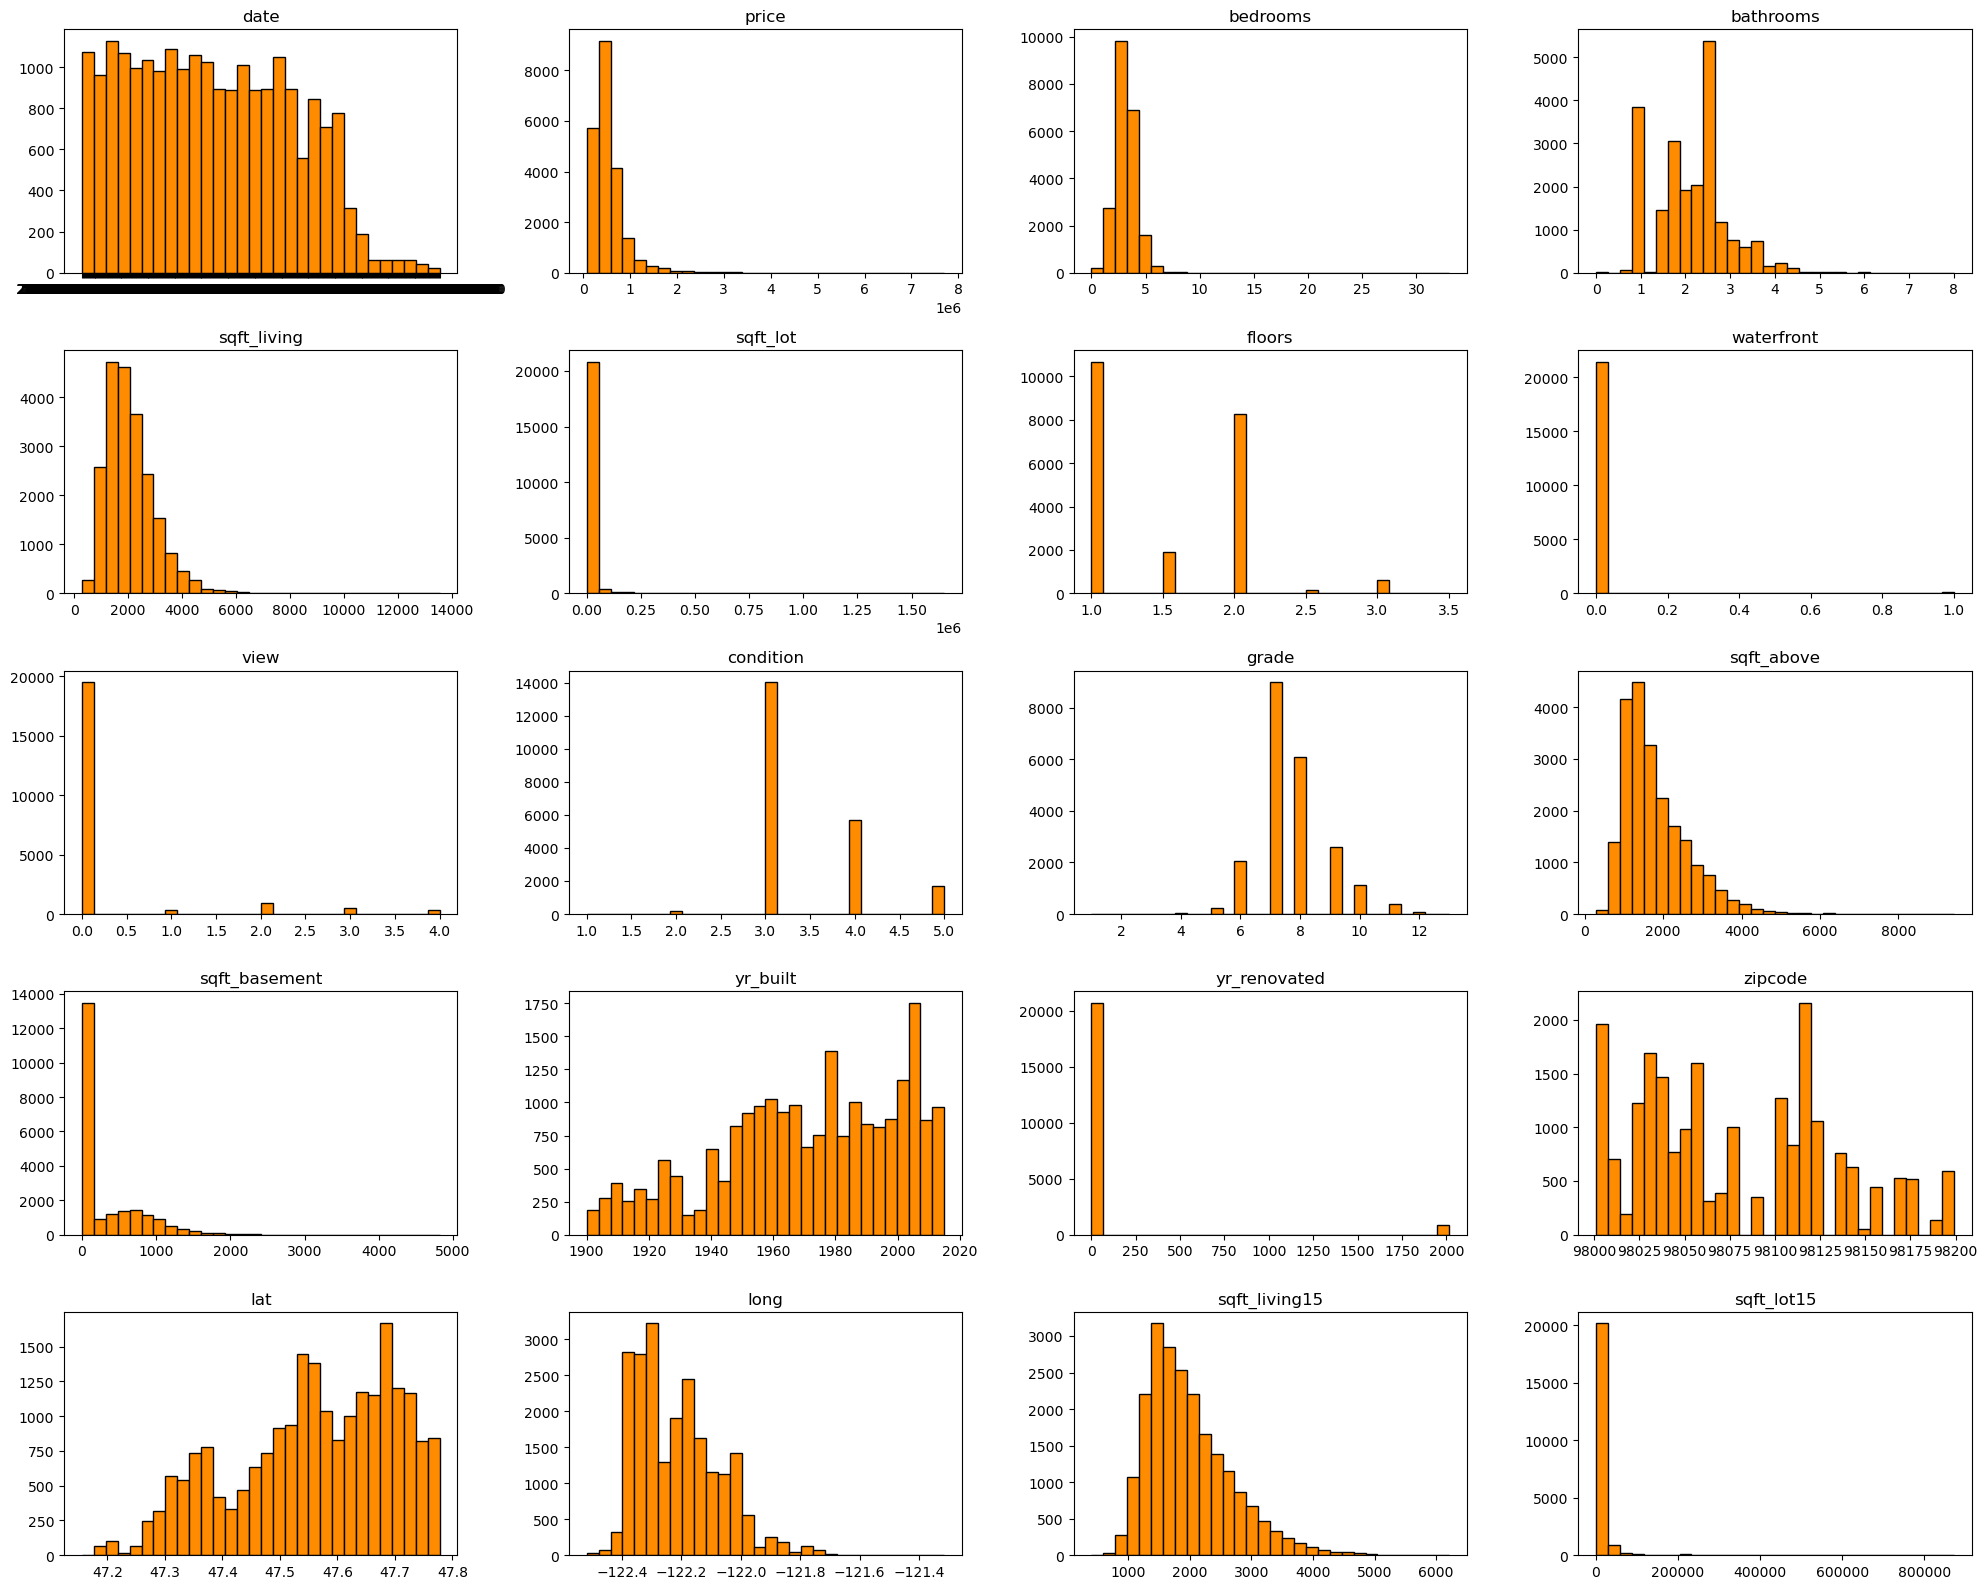

In [21]:
color = '#FF8C00'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(df.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(df.columns[i])

plt.tight_layout()
plt.show()

## <h3 style="color: #FF6347;">Checking our target distribution</h3>

In [22]:
#Hint: use sns and kde=True
## Va a ser "price"

df1.price.describe()


count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

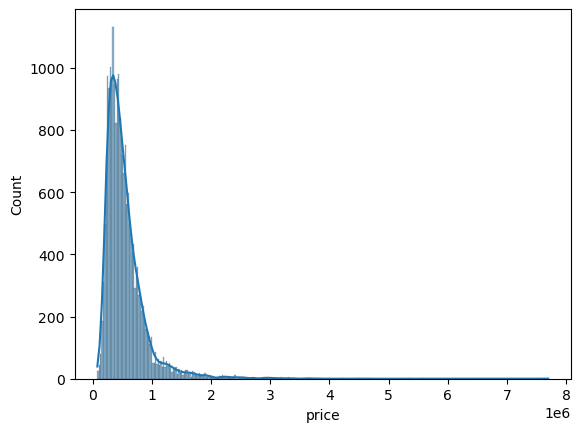

In [23]:
sns.histplot(df1.price,kde=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7a05960c5f40>,
 'caps': [<matplotlib.lines.Line2D at 0x7a0596179790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a05960c70e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a05960c5760>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a05960df170>],
 'means': []}

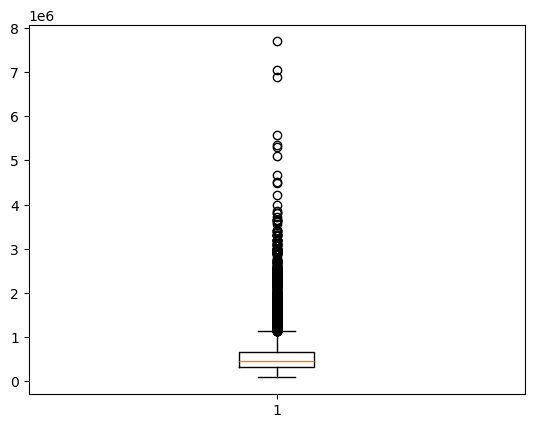

In [24]:
plt.boxplot(df1.price)

Vamos a intentar quitarnos las tres casas más caras, para tratar de dar un poco más de resolución al resto de la distribución 

In [25]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 16* IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

In [26]:
index_outliers_price=tukeys_test_outliers(df1.price).sort_values(ascending=False).index

In [27]:
df2=df1.copy()
df2=df2.drop(index_outliers_price)

In [28]:
len(df1)

21613

In [29]:
len(df2)

21610

<Axes: xlabel='price', ylabel='Count'>

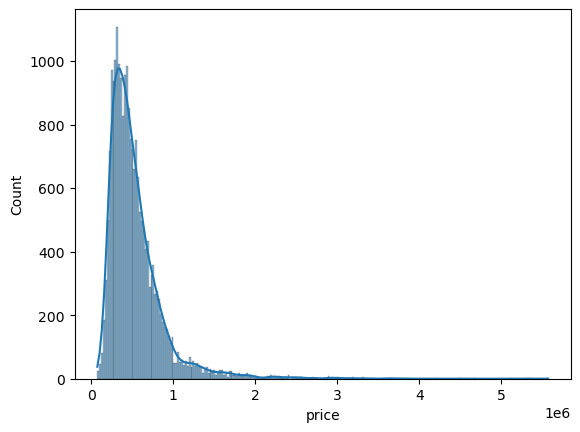

In [30]:
sns.histplot(df2.price,kde=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7a059452f050>,
 'caps': [<matplotlib.lines.Line2D at 0x7a059452f650>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a059452ede0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a059452fb90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a059452fe90>],
 'means': []}

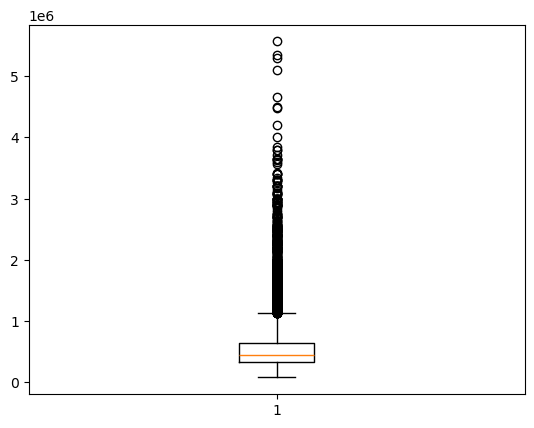

In [31]:
plt.boxplot(df2.price)

<h2 style="color: #FF6347;">Checking Outliers</h2>

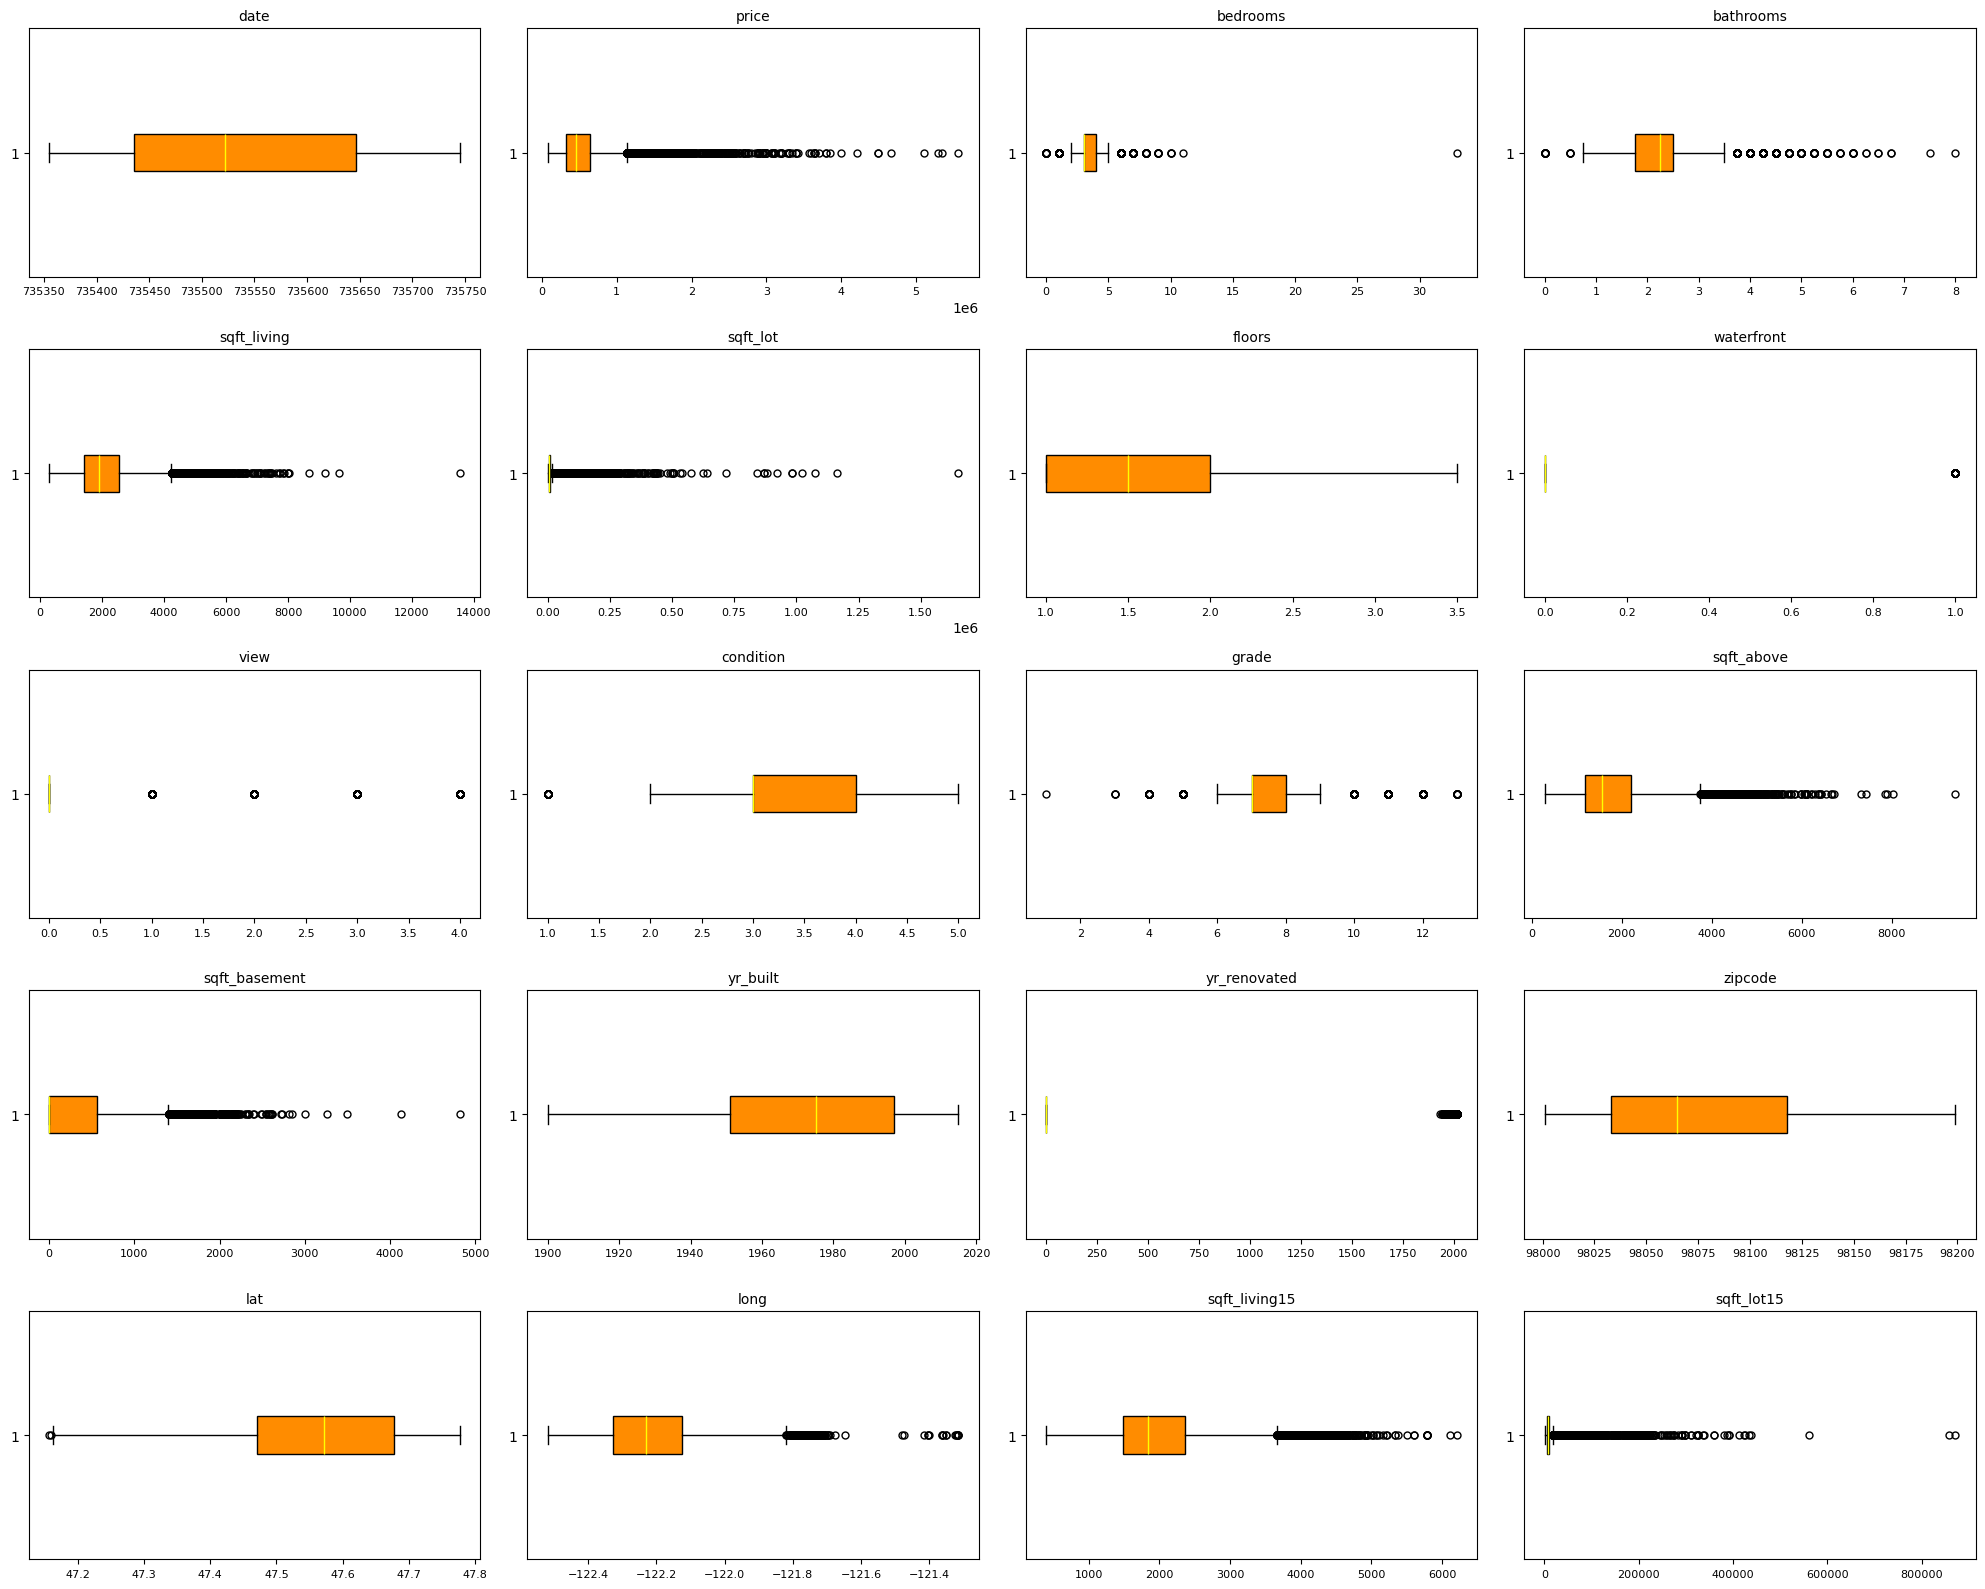

In [32]:
color = '#FF8C00'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(df2.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(df2.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(df2.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

Nos vamos a quitar la casa con 33 habitaciones, ya que es muy extraño que sea tan barata 

In [33]:
index_outlier_bedroom=df2[df2["bedrooms"] == 33].index
index_outlier_bedroom

Index([15870], dtype='int64')

In [34]:
df3=df2.copy()


In [35]:
df3=df3.drop(index_outlier_bedroom)


In [36]:
len(df3)-len(df2)

-1

####  sqft_living outlier

In [37]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5* IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

In [38]:
index_outlier_sqft_living=tukeys_test_outliers(df3.sqft_living).sort_values(ascending=False).head(1).index

In [39]:
df3=df3.drop(index_outlier_sqft_living)

####  sqft_lot outlier

In [40]:
index_outlier_lot=df3.sqft_lot.sort_values(ascending=False).head(1).index

In [41]:
df3=df3.drop(index_outlier_lot)

####  sqft_above outlier

In [42]:
index_outlier_above=df3.sqft_above.sort_values(ascending=False).head(1).index

In [43]:
df3=df3.drop(index_outlier_above)

####  sqft_lot15 outliers

In [44]:
index_outlier_lot15=df3.sqft_above.sort_values(ascending=False).head(2).index

In [45]:
df3=df3.drop(index_outlier_lot15)

In [46]:
df4=df3.copy()

<h2 style="color: #FF6347;">Looking for Correlations</h2>

In [47]:
# Call it num_corr
num_corr=df4.corr().round(3)
num_corr

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
date,1.000,-0.003,-0.015,-0.034,-0.033,0.005,-0.022,0.002,-0.002,-0.051,-0.040,-0.027,-0.018,-0.000,-0.024,0.001,-0.033,-0.007,-0.031,0.002
price,-0.003,1.000,0.316,0.521,0.697,0.092,0.259,0.265,0.398,0.038,0.673,0.599,0.320,0.056,0.122,-0.053,0.314,0.022,0.591,0.081
bedrooms,-0.015,0.316,1.000,0.528,0.593,0.031,0.180,-0.008,0.080,0.026,0.365,0.490,0.308,0.159,0.019,-0.157,-0.011,0.134,0.401,0.028
bathrooms,-0.034,0.521,0.528,1.000,0.752,0.091,0.501,0.063,0.184,-0.125,0.663,0.682,0.280,0.508,0.049,-0.204,0.024,0.224,0.567,0.086
sqft_living,-0.033,0.697,0.593,0.752,1.000,0.178,0.354,0.101,0.281,-0.058,0.764,0.874,0.431,0.322,0.052,-0.201,0.052,0.243,0.758,0.182
sqft_lot,0.005,0.092,0.031,0.091,0.178,1.000,-0.005,0.022,0.069,-0.011,0.119,0.189,0.014,0.058,0.008,-0.132,-0.085,0.235,0.147,0.720
floors,-0.022,0.259,0.180,0.501,0.354,-0.005,1.000,0.023,0.028,-0.264,0.458,0.526,-0.249,0.489,0.006,-0.059,0.049,0.125,0.279,-0.012
waterfront,0.002,0.265,-0.008,0.063,0.101,0.022,0.023,1.000,0.403,0.017,0.082,0.069,0.079,-0.026,0.091,0.031,-0.015,-0.042,0.085,0.031
view,-0.002,0.398,0.080,0.184,0.281,0.069,0.028,0.403,1.000,0.046,0.249,0.163,0.275,-0.053,0.103,0.085,0.006,-0.079,0.279,0.069
condition,-0.051,0.038,0.026,-0.125,-0.058,-0.011,-0.264,0.017,0.046,1.000,-0.144,-0.159,0.175,-0.361,-0.061,0.003,-0.015,-0.106,-0.092,-0.004


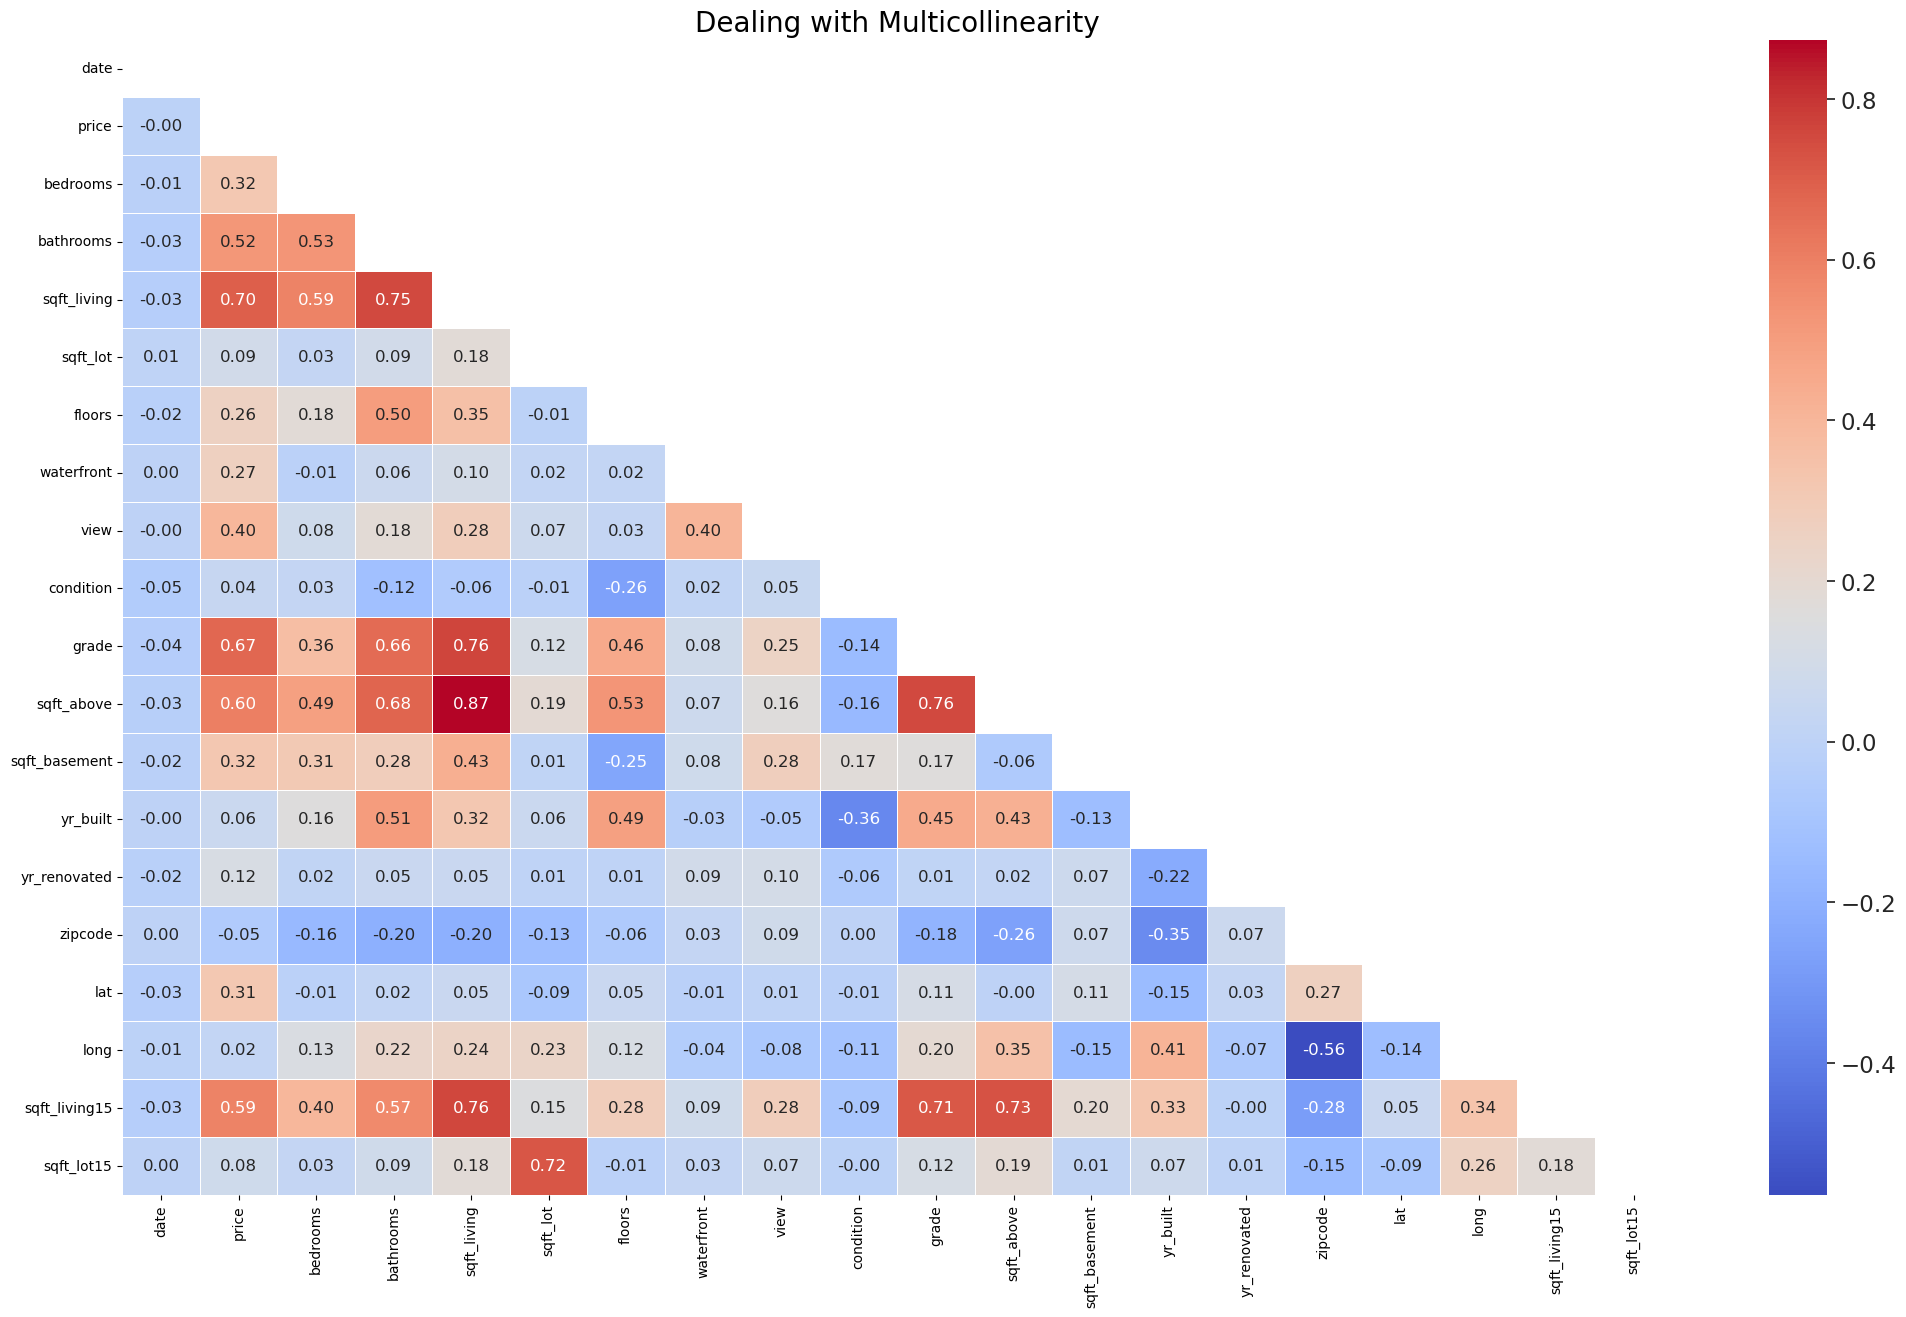

In [48]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

Nos quitamos sqft_above porque presenta colinearidad con varias variables. 

In [49]:
df5=df4.copy()

In [50]:
df5=df5.drop(columns=["sqft_above"])

In [51]:
## df5.to_csv("df_ready_with_price_outliers.csv",index=False)

# <h1 style="color: #FF8C00;">Data Preprocessing </h1>

## <h2 style="color: #FF6347;">X-y Split</h2>

In [52]:
X = df5.drop("price", axis=1)
y = df5["price"]

## <h1 style="color: #FF8C00;">Modeling</h1>

## <h2 style="color: #FF6347;">Train-Test Split</h2>

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
print(f'100% of our data: {len(df)}.')
print(f'70% for training data: {len(X_train)}.')
print(f'30% for test data: {len(X_test)}.')

100% of our data: 21613.
70% for training data: 15122.
30% for test data: 6482.


## <h2 style="color: #FF6347;">Selecting the Model: Linear Regression</h2>

In [55]:
model= LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## <h2 style="color: #FF6347;">Model Validation</h2>

In [56]:
predictions=model.predict(X_test)

In [57]:
print(f'30% for test prediction data: {len(predictions)}.')

30% for test prediction data: 6482.


## <h3 style="color: #FF6347;">Metrics</h3>

In [58]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)

/home/eduardo/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [59]:
#Printing the results
print("R2 = ", round(r2, 4))
print("RMSE = ", round(RMSE, 4))
print("The value of the metric MSE is ", round(MSE, 4))
print("MAE = ", round(MAE, 4))

R2 =  0.7031
RMSE =  202593.3053
The value of the metric MSE is  41044047342.4702
MAE =  125658.4041


# <h1 style="color: #FF8C00;">Improving the Model</h1>

#### Antes de intentar tocar ninguna columna más, vamos a probar la posibilidad de combinar diferentes modelos y normalizaciones 

## <h2 style="color: #FF6347;">Selecting the Model: Ridge Regression</h2>

In [60]:
from sklearn.linear_model import Ridge

In [61]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

## <h2 style="color: #FF6347;">Model Validation</h2>

In [62]:
predictions_ridge = ridge.predict(X_test)

## <h3 style="color: #FF6347;">Metrics</h3>

In [63]:
r2_ridge = r2_score(y_test, predictions_ridge)
RMSE_ridge = mean_squared_error(y_test, predictions_ridge, squared=False)
MSE_ridge = mean_squared_error(y_test, predictions_ridge)
MAE_ridge = mean_absolute_error(y_test, predictions_ridge)

/home/eduardo/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [64]:
#Printing the results
print("R2 = ", round(r2_ridge, 4))
print("RMSE = ", round(RMSE_ridge, 4))
print("The value of the metric MSE is ", round(MSE_ridge, 4))
print("MAE = ", round(MAE_ridge, 4))

R2 =  0.7031
RMSE =  202589.4177
The value of the metric MSE is  41042472174.3429
MAE =  125630.3577


## <h2 style="color: #FF6347;">Selecting the Model: Lasso Regression</h2>

In [65]:
from sklearn.linear_model import Lasso

In [66]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

## <h2 style="color: #FF6347;">Model Validation</h2>

In [67]:
predictions_lasso = lasso.predict(X_test)

## <h3 style="color: #FF6347;">Metrics</h3>

In [68]:
r2_lasso = r2_score(y_test, predictions_lasso)
RMSE_lasso = mean_squared_error(y_test, predictions_lasso, squared=False)
MSE_lasso= mean_squared_error(y_test, predictions_lasso)
MAE_lasso = mean_absolute_error(y_test, predictions_lasso)

/home/eduardo/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [69]:
#Printing the results
print("R2 = ", round(r2_lasso, 4))
print("RMSE = ", round(RMSE_lasso, 4))
print("The value of the metric MSE is ", round(MSE_lasso, 4))
print("MAE = ", round(MAE_lasso, 4))

R2 =  0.7031
RMSE =  202593.2732
The value of the metric MSE is  41044034341.3795
MAE =  125657.1212


## <h2 style="color: #FF6347;">Selecting the Model: Decision Tree Regression</h2>

In [70]:
from sklearn.tree import DecisionTreeRegressor

In [71]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

## <h2 style="color: #FF6347;">Model Validation</h2>

In [72]:
predictions_tree = tree.predict(X_test)

<h3 style="color: #FF6347;">Metrics</h3>

In [73]:
r2_tree = r2_score(y_test, predictions_tree)
RMSE_tree = mean_squared_error(y_test, predictions_tree, squared=False)
MSE_tree = mean_squared_error(y_test, predictions_tree)
MAE_tree = mean_absolute_error(y_test, predictions_tree)

/home/eduardo/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [74]:
#Printing the results
print("R2 = ", round(r2_tree, 4))
print("RMSE = ", round(RMSE_tree, 4))
print("The value of the metric MSE is ", round(MSE_tree, 4))
print("MAE = ", round(MAE_tree, 4))

R2 =  0.7581
RMSE =  182863.3148
The value of the metric MSE is  33438991916.32
MAE =  100826.5455


### Linear Regression

![image.png](attachment:image.png)

![image.png](attachment:67e27663-eb14-4b55-bb19-79e7b93f10b6.png)

<h2 style="color: #FF6347;">Selecting the Model: KNN Regression</h2>

In [75]:
from sklearn.neighbors import KNeighborsRegressor

In [76]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

<h2 style="color: #FF6347;">Model Validation</h2>

In [77]:
predictions_knn = knn.predict(X_test)

<h3 style="color: #FF6347;">Metrics</h3>

In [78]:
r2_knn = r2_score(y_test, predictions_knn)
RMSE_knn = mean_squared_error(y_test, predictions_knn, squared=False)
MSE_knn = mean_squared_error(y_test, predictions_knn)
MAE_knn = mean_absolute_error(y_test, predictions_knn)

/home/eduardo/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [79]:
#Printing the results
print("R2 = ", round(r2_knn, 4))
print("RMSE = ", round(RMSE_knn, 4))
print("The value of the metric MSE is ", round(MSE_knn, 4))
print("MAE = ", round(MAE_knn, 4))

R2 =  0.4679
RMSE =  271220.0934
The value of the metric MSE is  73560339039.8424
MAE =  163579.904


![image.png](attachment:image.png)

<h2 style="color: #FF6347;">Selecting the Model: XGBoost Regression</h2>

In [80]:
import xgboost as xgb

In [81]:
xgbr = xgb.XGBRFRegressor()
xgbr.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

<h2 style="color: #FF6347;">Model Validation</h2>

In [82]:
predictions_xgb = xgbr.predict(X_test)

<h3 style="color: #FF6347;">Metrics</h3>

In [83]:
r2_boost = r2_score(y_test, predictions_xgb)
RMSE_boost = mean_squared_error(y_test, predictions_xgb, squared=False)
MSE_boost = mean_squared_error(y_test, predictions_xgb)
MAE_boost = mean_absolute_error(y_test, predictions_xgb)

/home/eduardo/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [84]:
#Printing the results
print("R2 = ", round(r2_boost, 4))
print("RMSE = ", round(RMSE_boost, 4))
print("The value of the metric MSE is ", round(MSE_boost, 4))
print("MAE = ", round(MAE_boost, 4))

R2 =  0.8124
RMSE =  161057.5219
The value of the metric MSE is  25939525356.9512
MAE =  95157.8159


<h2 style="color: #FF6347;">Final Comparison?</h2>

In [85]:
metrics = {
    'Model': ['Linear Regression', 'Ridge', 'Lasso', 'Decision Tree', 'KNN', 'XGBoost'],
    'R²': [r2, r2_ridge, r2_lasso, r2_tree, r2_knn, r2_boost],
    'RMSE': [RMSE, RMSE_ridge, RMSE_lasso, RMSE_tree, RMSE_knn, RMSE_boost],
    'MSE': [MSE, MSE_ridge, MSE_lasso, MSE_tree, MSE_knn, MSE_boost],
    'MAE': [MAE, MAE_ridge, MAE_lasso, MAE_tree, MAE_knn, MAE_boost]
}

In [86]:
df_metrics =round(pd.DataFrame(metrics),3)
df_metrics.set_index("Model").T

Model,Linear Regression,Ridge,Lasso,Decision Tree,KNN,XGBoost
R²,7.030000e-01,7.030000e-01,7.030000e-01,7.580000e-01,4.680000e-01,8.120000e-01
RMSE,2.025933e+05,2.025894e+05,2.025933e+05,1.828633e+05,2.712201e+05,1.610575e+05
MSE,4.104405e+10,4.104247e+10,4.104403e+10,3.343899e+10,7.356034e+10,2.593953e+10
MAE,1.256584e+05,1.256304e+05,1.256571e+05,1.008265e+05,1.635799e+05,9.515782e+04


# <h1 style="color: #FF6347;">Furhter improving the model...</h1>

## <h2 style="color: #FF6347;">Normalization with MinMaxScaler</h2>

In [87]:
from sklearn.preprocessing import MinMaxScaler 

In [88]:
scaler = MinMaxScaler()

In [89]:
X_train_scaled = scaler.fit_transform(X_train) ## SOlo transformamos las features! no la target, ya que no 
X_test_scaled = scaler.fit_transform(X_test)   ## podemos cambiar su magnitud, e igualmente el potencial de predicción
                                                ## permanece sobre "X"

In [90]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train_scaled, y_train)

predictions_xgb_2 = xgbr.predict(X_test_scaled) ## Obvio que el test tiene que ser también con los 
                                                ## valores escalados. 

In [91]:
r2_xg_sca = r2_score(y_test, predictions_xgb_2)
RMSE_xg_sca = mean_squared_error(y_test, predictions_xgb_2, squared=False)
MSE_xg_sca = mean_squared_error(y_test, predictions_xgb_2)
MAE_xg_sca = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_xg_sca, 4))
print("RMSE = ", round(RMSE_xg_sca, 4))
print("The value of the metric MSE is ", round(MSE_xg_sca, 4))
print("MAE = ", round(MAE_xg_sca, 4))

R2 =  0.8509
RMSE =  143561.1069
The value of the metric MSE is  20609791423.7231
MAE =  90394.5385


/home/eduardo/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## <h2 style="color: #FF6347;">Normalization with StandardScaler</h2>

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [94]:
xgbr.fit(X_train_scaled, y_train)
predictions_xgb_2 = xgbr.predict(X_test_scaled)

In [95]:
r2_xg_stand = r2_score(y_test, predictions_xgb_2)
RMSE_xg_stand = mean_squared_error(y_test, predictions_xgb_2, squared=False)
MSE_xg_stand = mean_squared_error(y_test, predictions_xgb_2)
MAE_xg_stand = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_xg_stand, 4))
print("RMSE = ", round(RMSE_xg_stand, 4))
print("The value of the metric MSE is ", round(MSE_xg_stand, 4))
print("MAE = ", round(MAE_xg_stand, 4))

R2 =  0.898
RMSE =  118732.7451
The value of the metric MSE is  14097464754.1991
MAE =  66652.7608


/home/eduardo/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## <h2 style="color: #FF6347;">Normalization with Log Transform</h2>

In [96]:
X_train_log = np.log1p(X_train)  # np.log1p is useful to handle zero values in your data
X_test_log = np.log1p(X_test)

/home/eduardo/anaconda3/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


In [97]:
xgbr.fit(X_train_log, y_train)
predictions_xgb_2 = xgbr.predict(X_test_log)

In [98]:
r2_xg_log = r2_score(y_test, predictions_xgb_2)
RMSE_xg_log = mean_squared_error(y_test, predictions_xgb_2, squared=False)
MSE_xg_log = mean_squared_error(y_test, predictions_xgb_2)
MAE_xg_log = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_xg_log, 4))
print("RMSE = ", round(RMSE_xg_log, 4))
print("The value of the metric MSE is ", round(MSE_xg_log, 4))
print("MAE = ", round(MAE_xg_log, 4))

R2 =  0.879
RMSE =  129346.3998
The value of the metric MSE is  16730491150.9848
MAE =  72031.9453


/home/eduardo/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


De momento vamos a quedarnos con el modelo de XGBoost con una normalización mediante Standard Scaler, ya que es el que no ha dado mayor R cuadrado (0.89). No obstante, exploraremos colinearidades con otras columnas, a ver si podemos subir el porcentaje.

# <h2 style="color: #FF6347;">Improving it dropping multicollinearity features</h2>

In [99]:
df5.corrwith(df5["price"]).sort_values(ascending=False)

price            1.000000
sqft_living      0.697279
grade            0.673057
sqft_living15    0.590556
bathrooms        0.521425
view             0.398066
sqft_basement    0.320442
bedrooms         0.315612
lat              0.313612
waterfront       0.265022
floors           0.259208
yr_renovated     0.122008
sqft_lot         0.091512
sqft_lot15       0.081180
yr_built         0.056412
condition        0.038216
long             0.022443
date            -0.002696
zipcode         -0.052903
dtype: float64

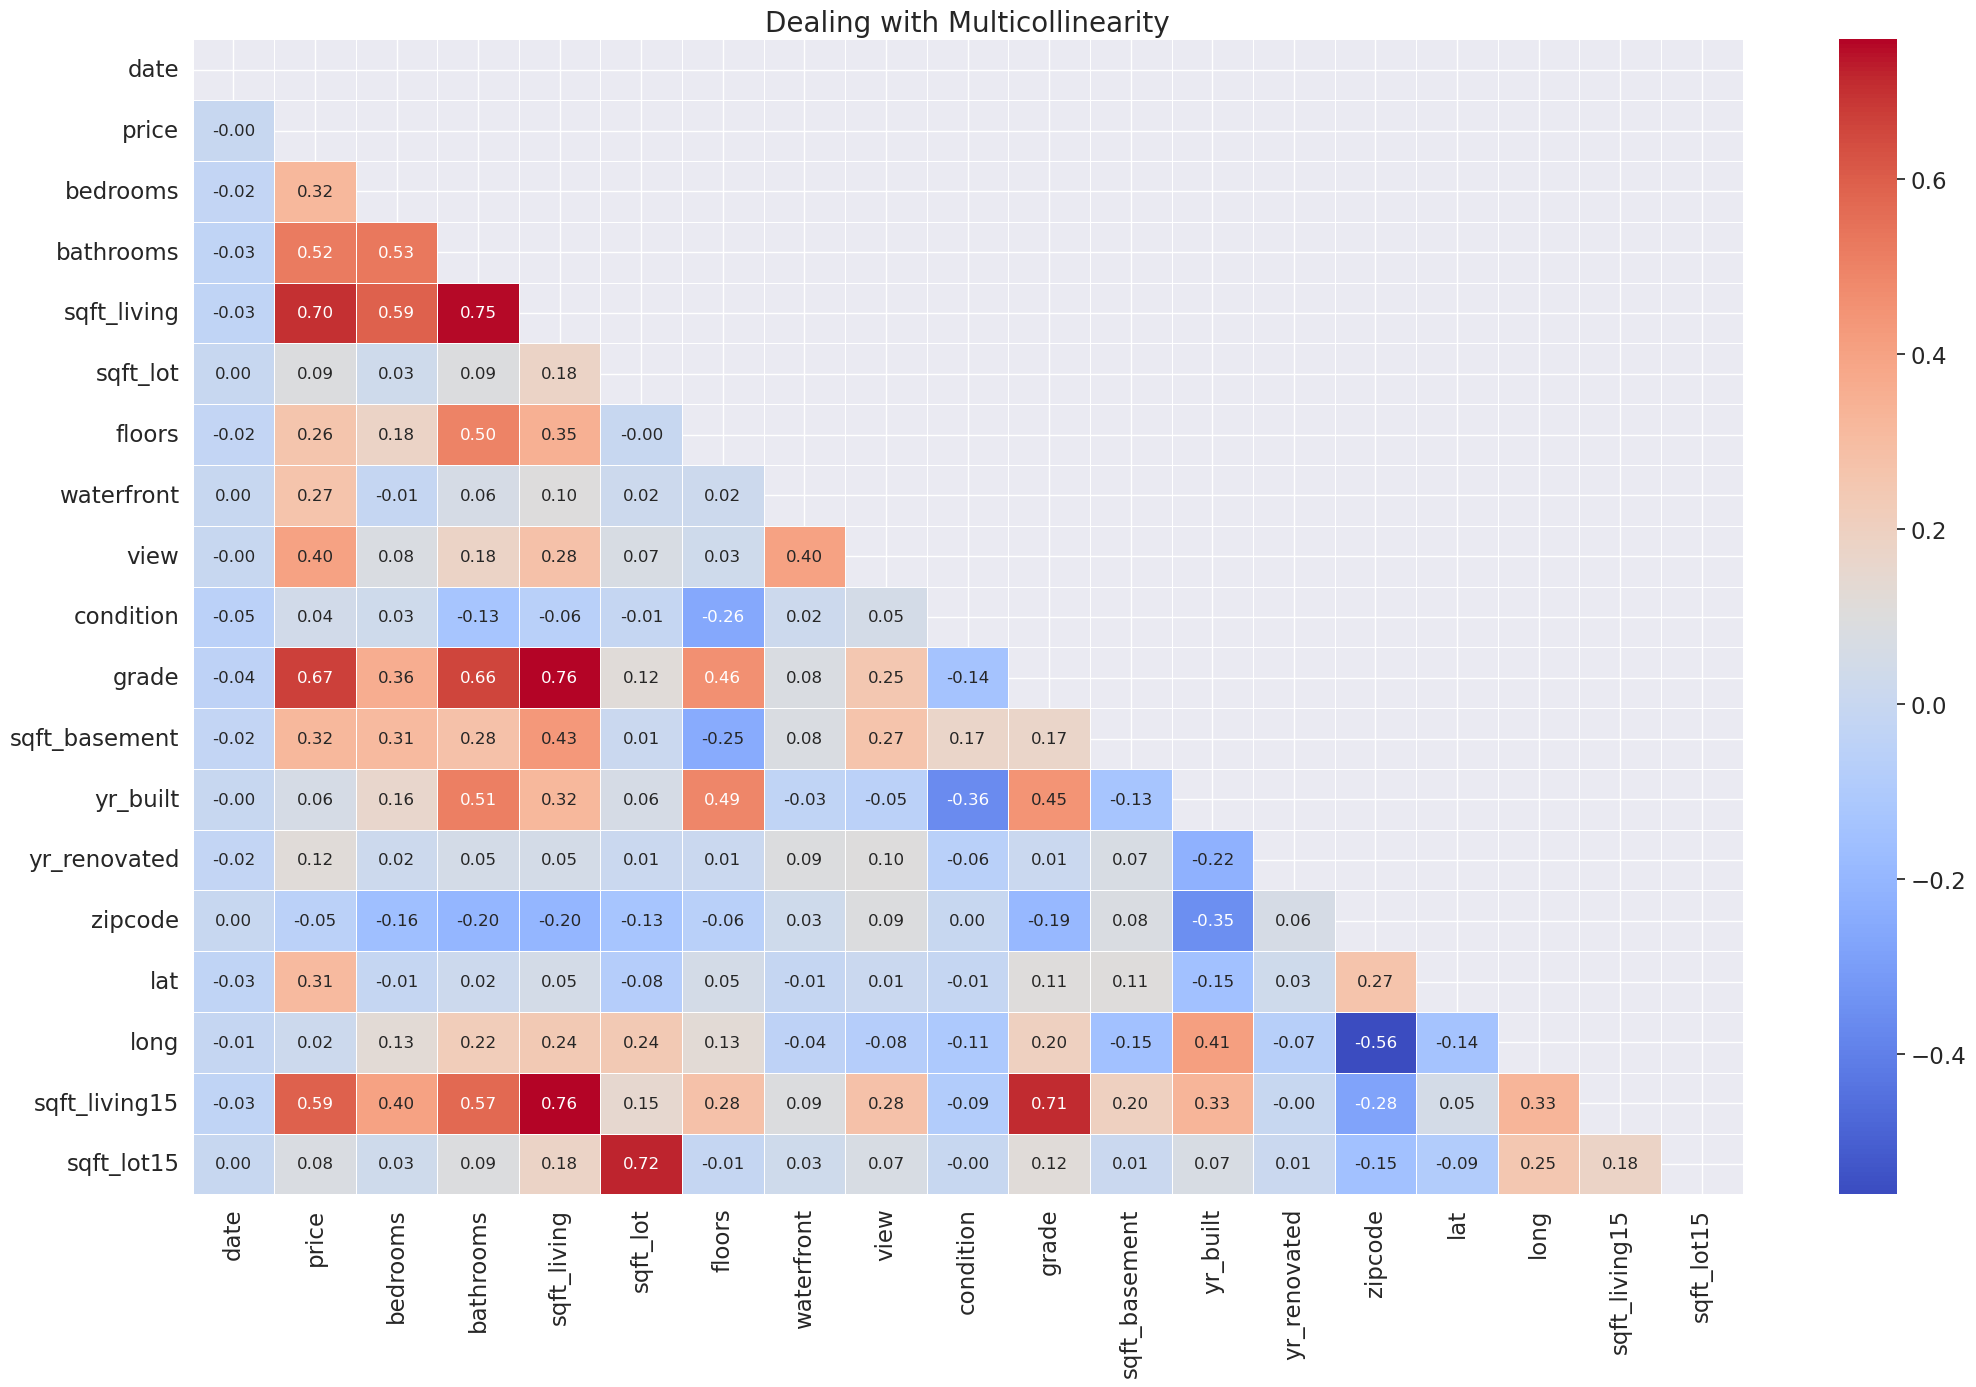

In [ ]:
num_corr=round(df5.corr(),2)
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))R²
RMSE
MSE
MAe
0.81
16,11 xe⁴
25,94×e⁹
25,94×e³
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

### Método Oscar

In [128]:
X_new = X.drop(["bathrooms"], axis=1)

In [129]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

In [130]:
## df5.to_csv("../data/project_clean.csv",index=False)

In [131]:
xgbr = xgb.XGBRFRegressor()
xgbr.fit(X_train_new, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

<h2 style="color: #FF6347;">Model Validation</h2>

In [152]:
predictions_xgb = xgbr.predict(X_test_new)

predictions_xgb

array([3605797.5, 3605797.5, 3479654.2, ..., 3605797.5, 3479654.2,
       3524540.8], dtype=float32)

<h3 style="color: #FF6347;">Metrics</h3>

In [133]:
r2_boost = r2_score(y_test, predictions_xgb)
RMSE_boost = mean_squared_error(y_test, predictions_xgb, squared=False)
MSE_boost = mean_squared_error(y_test, predictions_xgb)
MAE_boost = mean_absolute_error(y_test, predictions_xgb)

/home/eduardo/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [134]:
#Printing the results
print("R2 = ", round(r2_boost, 4))
print("RMSE = ", round(RMSE_boost, 4))
print("The value of the metric MSE is ", round(MSE_boost, 4))
print("MAE = ", round(MAE_boost, 4))

R2 =  0.8166
RMSE =  159216.1081
The value of the metric MSE is  25349769072.4721
MAE =  94439.2925


In [135]:
scaler = StandardScaler()
X_train_scaled_new = scaler.fit_transform(X_train_new)
X_test_scaled_new = scaler.transform(X_test_new)

In [136]:
xgbr.fit(X_train_scaled_new, y_train)
predictions_xgb_2 = xgbr.predict(X_test_scaled_new)

In [137]:
r2_xg_stand = r2_score(y_test, predictions_xgb_2)
RMSE_xg_stand = mean_squared_error(y_test, predictions_xgb_2, squared=False)
MSE_xg_stand = mean_squared_error(y_test, predictions_xgb_2)
MAE_xg_stand = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_xg_stand, 4))
print("RMSE = ", round(RMSE_xg_stand, 4))
print("The value of the metric MSE is ", round(MSE_xg_stand, 4))
print("MAE = ", round(MAE_xg_stand, 4))

R2 =  0.8166
RMSE =  159216.1081
The value of the metric MSE is  25349769072.4721
MAE =  94439.2925


/home/eduardo/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Tras quitar sfqt_living 15 ha empeorado el resultado. R cuadrado= 0.8117
Tras quitar yr_built ha empeorado un poco más. R cuadrado= 0.8072
ras quitar bathrooms R cuadrado= 0.8166
Quitando Bathrooms, mejoramos la r cuadrado respecto al modelo XGBoost sin estandarizar. 


<h2 style="color: #FF6347;">Comparing luxury and non luxury estates</h2>

In [145]:
df_luxury_estates=df5[df5["price"]>650000]

In [146]:
df_normal_estates=df5[df5["price"]<650000]

In [149]:
df_luxury_estates.bathrooms.mean()

2.682342758222735

In [148]:
df_normal_estates.bathrooms.mean()

1.9311302799607073

In [150]:
df_luxury_estates.bedrooms.mean()

3.826697441815734

In [151]:
df_normal_estates.bedrooms.mean()

3.2208988212180745

In [155]:
df_normal_estates.grade.mean()

7.267436149312378

In [156]:
df_luxury_estates.grade.mean()

8.866320446239662

In [157]:
df_luxury_estates.sqft_living.mean()

3011.7118676668592

In [158]:
df_normal_estates.sqft_living.mean()

1777.47980108055

(array([4.084e+03, 7.110e+02, 2.260e+02, 1.010e+02, 4.200e+01, 1.800e+01,
        9.000e+00, 3.000e+00, 1.000e+00, 4.000e+00]),
 array([ 650100., 1142090., 1634080., 2126070., 2618060., 3110050.,
        3602040., 4094030., 4586020., 5078010., 5570000.]),
 <BarContainer object of 10 artists>)

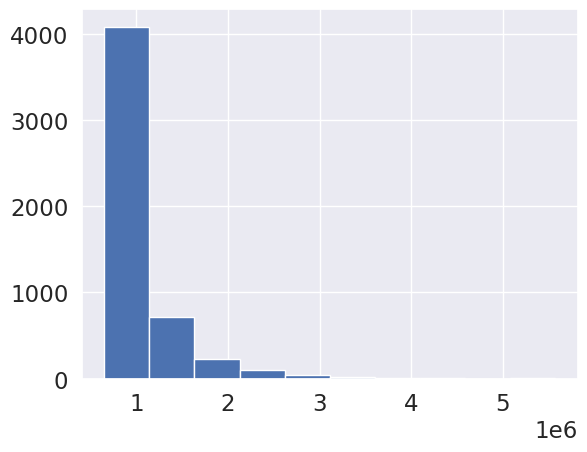

In [142]:
plt.hist(df_luxury_estates.price)